In [1]:
import pandas as pd

# Reading the data

In [2]:
df = pd.read_csv('income_data.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


## DISCLAIMER

In a real-world application, samples should be weighted by the fnlwgt column. We will ignore this here at our own peril.

<AxesSubplot:xlabel='age', ylabel='education-num'>

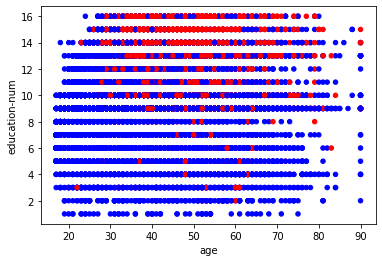

In [7]:
df.plot.scatter('age', 'education-num',
               c=['r' if t == 1 else 'b' for t in df.target])

# Feature Processing

In [8]:
df[['hours-per-week', 'education-num']].iloc[10:20]

,hours-per-week,education-num
10,80,10
11,40,13
12,30,13
13,50,12
14,40,11
15,45,4
16,35,9
17,40,9
18,50,7
19,45,14


<AxesSubplot:ylabel='Frequency'>

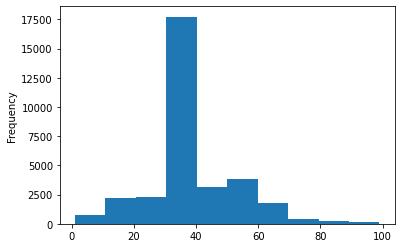

In [9]:
df['hours-per-week'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

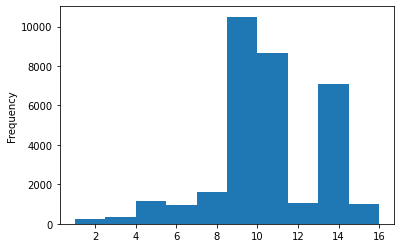

In [11]:
df['education-num'].plot.hist()

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
num_features = ['age', 'education-num', 'hours-per-week']

In [15]:
scaler = StandardScaler().fit(df[num_features])

In [16]:
scaler.transform(df[num_features]) # array, not a data frame

array([[ 0.03067056,  1.13473876, -0.03542945],
       [ 0.83710898,  1.13473876, -2.22215312],
       [-0.04264203, -0.42005962, -0.03542945],
       ...,
       [ 1.42360965, -0.42005962, -0.03542945],
       [-1.21564337, -0.42005962, -1.65522476],
       [ 0.98373415, -0.42005962, -0.03542945]])

## The Pandas way

In [19]:
X_num = df[num_features]
scaled_num_df = (X_num - X_num.mean()) / X_num.std()

In [20]:
scaled_num_df

,age,education-num,hours-per-week
0,0.030670,1.134721,-0.035429
1,0.837096,1.134721,-2.222119
2,-0.042641,-0.420053,-0.035429
3,1.057031,-1.197440,-0.035429
4,-0.775756,1.134721,-0.035429
...,...,...,...
32556,-0.849067,0.746028,-0.197406
32557,0.103982,-0.420053,-0.035429
32558,1.423588,-0.420053,-0.035429
32559,-1.215625,-0.420053,-1.655199


In [21]:
scaled_num_df.mean()

age              -4.844461e-17
education-num     1.420605e-16
hours-per-week   -2.836846e-17
dtype: float64

In [22]:
scaled_num_df.std()

age               1.0
education-num     1.0
hours-per-week    1.0
dtype: float64

## Dealing with categorical data

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
cat_features = ['workclass', 'sex']

In [28]:
oh_encoder = OneHotEncoder(drop='first', sparse=False).fit(df[cat_features])

In [29]:
oh_encoder.transform(df[cat_features])

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
oh_encoder.categories_

[array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object),
 array([' Female', ' Male'], dtype=object)]

## The Pandas Way

In [33]:
one_hot_df = pd.get_dummies(df[cat_features], drop_first=True)

In [34]:
one_hot_df

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,sex_ Male
0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0,0,0
32557,0,0,0,1,0,0,0,0,1
32558,0,0,0,1,0,0,0,0,0
32559,0,0,0,1,0,0,0,0,1


# Assemble the data

In [35]:
X = one_hot_df.join(scaled_num_df)
y = df['target']

In [36]:
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,sex_ Male,age,education-num,hours-per-week
0,0,0,0,0,0,0,1,0,1,0.030670,1.134721,-0.035429
1,0,0,0,0,0,1,0,0,1,0.837096,1.134721,-2.222119
2,0,0,0,1,0,0,0,0,1,-0.042641,-0.420053,-0.035429
3,0,0,0,1,0,0,0,0,1,1.057031,-1.197440,-0.035429
4,0,0,0,1,0,0,0,0,0,-0.775756,1.134721,-0.035429


# Fitting a model

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
from sklearn.model_selection import train_test_split

In [55]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [56]:
model = KNeighborsClassifier(20).fit(Xtrain, ytrain)

In [57]:
model.predict(Xtest.iloc[[0]])

array([0])

In [58]:
# is this right?
ytest.iloc[0]

0

# Evaluate your model

In [59]:
(model.predict(Xtest) == ytest).mean() # accuracy score

0.8064284983109837

In [60]:
from sklearn import metrics

In [61]:
metrics.accuracy_score(ytest, model.predict(Xtest))

0.8064284983109837

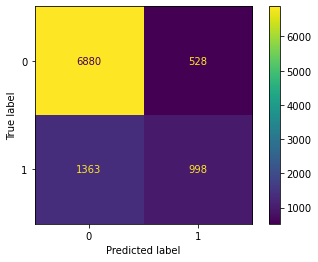

In [62]:
metrics.plot_confusion_matrix(model, Xtest, ytest)

In [63]:
model.predict_proba(Xtest)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.45, 0.55],
       [1.  , 0.  ],
       [0.9 , 0.1 ]])

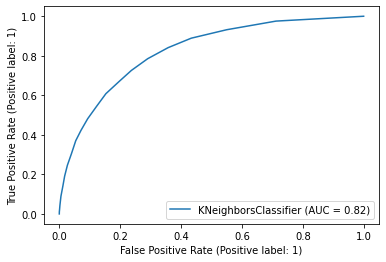

In [64]:
metrics.plot_roc_curve(model, Xtest, ytest)

In [65]:
print(metrics.classification_report(ytest, model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7408
           1       0.65      0.42      0.51      2361

    accuracy                           0.81      9769
   macro avg       0.74      0.68      0.70      9769
weighted avg       0.79      0.81      0.79      9769

